In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df = diabetes.copy()
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


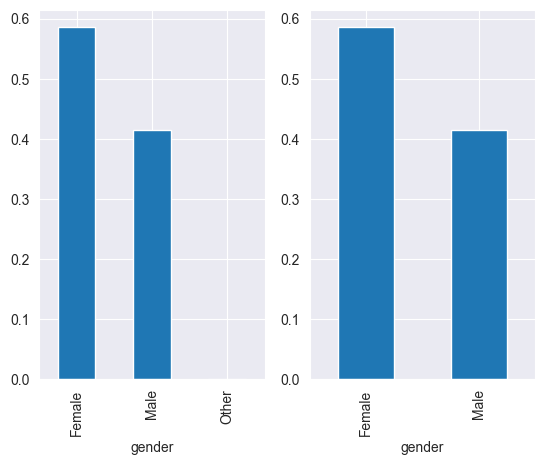

In [6]:
plt.subplot(1, 2, 1)
diabetes['gender'].value_counts(normalize = True).plot(kind='bar');
df = df.loc[~(df['gender'] == 'Other'), :]
plt.subplot(1, 2, 2)
df['gender'].value_counts(normalize = True).plot(kind='bar');

In [7]:
#Convert Female and Male to 0 and 1.
convert_gender = {
    'Female':0,
    'Male':1
}

gender_categorical = []
for i in df['gender']:
    gender_categorical.append(convert_gender[i])


checking = pd.DataFrame({'Actual Gender': diabetes.loc[diabetes['gender'] != 'Other', 'gender'], 'Converted Gender': gender_categorical})
df['gender'] = gender_categorical
df['gender'] = df['gender'].astype('category')

In [8]:
#Change smoking_history column's type to category type.
convert_smoking_history = {
    'never': 4,
    'No Info': 0,
    'current': 1,
    'former': 3,
    'ever': 2,
    'not current':5

}
df['smoking_history'] = df['smoking_history'].astype('category')
df['smoking_history'] = df['smoking_history'].cat.codes
df['smoking_history'] = df['smoking_history'].astype('category')

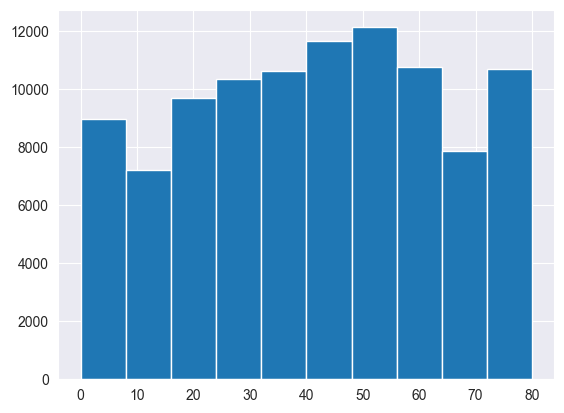

In [9]:
df['age'].hist();

In [10]:
df = df[df['age'].mod(1) == 0]
df['age'] = df['age'].astype('int')
df['diabetes'] = df['diabetes'].astype('category')

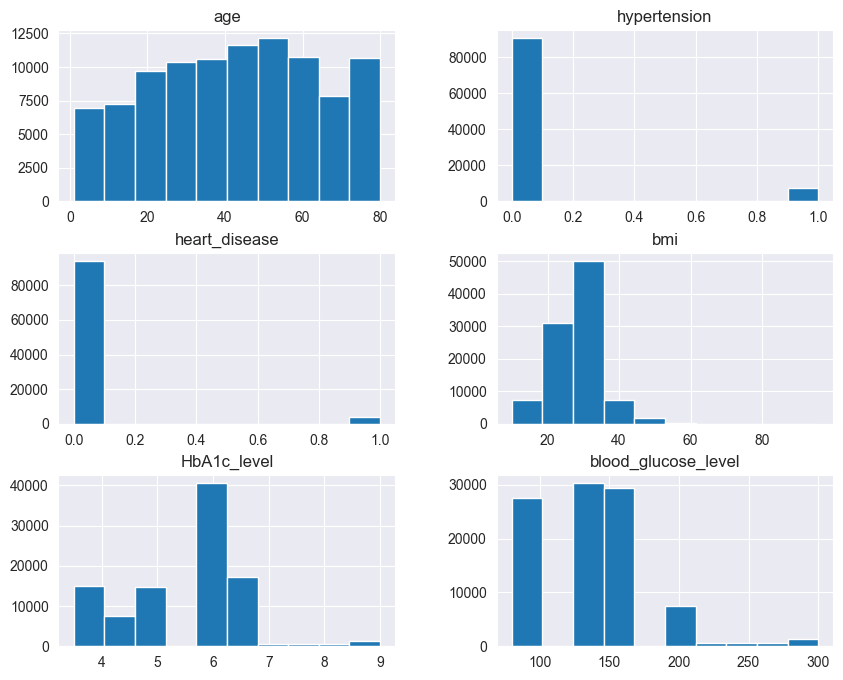

In [11]:
df.hist(bins=10, figsize=(10,8))
plt.show()

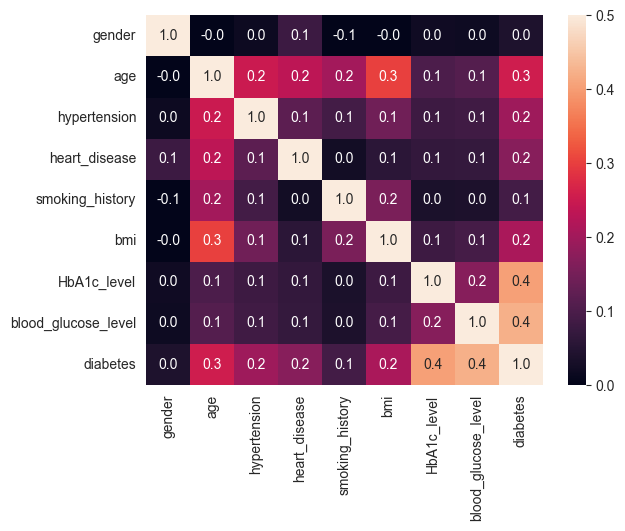

In [12]:
#Relationship between variables
sns.heatmap(df.corr(), annot=True, fmt=".1f", vmin=0, vmax=0.5);

In [13]:
#Split data into three groups. Train, test and validation.
from sklearn.model_selection import train_test_split

X = df.drop('diabetes', axis = 1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 1)

In [14]:
from sklearn import metrics as m
def calculating_metrics(model, x_test, y_test, x_val, y_val):
    test_pred = model.predict(x_test)
    validation_pred = model.predict(x_val)

    return pd.DataFrame({
        'Test set': [m.accuracy_score(y_test, test_pred),
                     m.r2_score(y_test, test_pred),
                     m.mean_squared_error(y_test, test_pred),
                     np.sqrt(m.mean_squared_error(y_test, test_pred)),
                     m.mean_absolute_error(y_test, test_pred)],
        "Validation set": [m.accuracy_score(y_val, validation_pred),
                           m.r2_score(y_val, validation_pred),
                           m.mean_squared_error(y_val, validation_pred),
                           np.sqrt(m.mean_squared_error(y_val, validation_pred)),
                           m.mean_absolute_error(y_val, validation_pred)]},
        index = ['Accuracy score', 'R2 Score', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error'])

In [15]:
#Logistic Regression
from sklearn import linear_model

log_model = linear_model.LogisticRegression(solver = 'liblinear')
log_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [16]:
return_value = calculating_metrics(log_model, X_test, y_test, X_val, y_val)
return_value

,Test set,Validation set
Accuracy score,0.959375,0.959283
R2 Score,0.481756,0.477463
Mean Squared Error,0.040625,0.040717
Root Mean Squared Error,0.201556,0.201784
Mean Absolute Error,0.040625,0.040717
